In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit_2_Build_Week/master/framingham.csv')

In [3]:
target = 'TenYearCHD'

In [4]:
df[target].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df['education'] = df['education'].fillna(value=df['education'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(value=df['cigsPerDay'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(value=df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(value=df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(value=df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(value=df['heartRate'].mode()[0])
df['glucose'] = df['glucose'].fillna(value=df['glucose'].mean())

In [9]:
df.shape

(4238, 16)

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()

# profile


## can't save it if i keep this cell outputted..

In [12]:
train,test = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
train.shape, test.shape

((3390, 16), (848, 16))

In [14]:
# import plotly.express as px

# fig = px.scatter(train, x='TenYearCHD', y='cigsPerDay')
# fig.show()

In [15]:
### use feature importance
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
target = 'TenYearCHD'
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

In [18]:
x_train_new, y_train_new = sm.fit_resample(x_train, y_train)

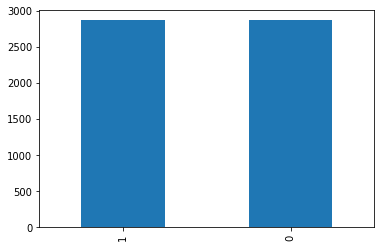

In [19]:
pd.Series(y_train_new).value_counts().plot.bar()

In [20]:
y_train_new.value_counts(normalize=True)

1    0.5
0    0.5
Name: TenYearCHD, dtype: float64

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [26]:
clf.fit(x_train_new, y_train_new)
train_pred = clf.predict(x_train_new)
test_pred = clf.predict(x_test)

print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.63397212543554
Accuracy score for Testing Dataset =  0.5919811320754716


/home/cjmckay7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(XGBClassifier(n_estimators=100,
                  random_state=42,
                  n_jobs=-1)
)

pipeline.fit(x_train_new, y_train_new)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method=None,
                               validate_parameters=False, verbosity=None))])

In [27]:
tr_pred = pipeline.predict(x_train_new)
test_predict = pipeline.predict(x_test)

In [30]:
print('Training Accuracy:', pipeline.score(x_train_new, y_train_new))
print('Testing Accuracy: ', accuracy_score(test_predict, y_test))

Training Accuracy: 0.9900696864111498
Testing Accuracy:  0.8231132075471698
